### Latar Belakang
##### Deskripsi Data
* Masalah klasifikasi biner
* Sumber data dari Kaggle : https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package. Dengan jumlah baris 145460. Database ini memiliki 23 atribut. Dengan data hujan harian selama 10 tahun di Australia, kolom RainTomorrow adalah target variable yang mau kita prediksi. Jika “Yes” maka besok harinya disana hujan 1mm atau lebih.
1. Date - tanggal hari itu
2. Location - lokasi, nama kota di Australia
3. MinTemp - temperatur terendah hari itu dalam celcius
4. MaxTemp - temperatur tertinggi hari itu dalam celcius
5. Rainfall - jumlah curah hujan hari itu dalam mm
6. Evaporation - jumlah evaporasi dalam mm dari Class A pan selama 24 jam
sebelum jam 9 pagi hari itu
7. Sunshine - jumlah jam hari itu cerah dengan cahaya matahari
8. WindGustDir - arah kecepatan angin yang paling tinggi selama 24 jam sebelum
jam 12 malam hari itu
9. WindGustSpeed - kecepatan angin yang paling tinggi dalam km/jam selama 24
jam sebelum jam 12 malam hari itu
10. WindDir9am - arah angin jam 9 pagi
11. WindDir3pm - arah angin jam 3 sore
12. WindSpeed9am - kecepatan angin jam 9 pagi dalam km/jam dihitung dari
rata-rata kecepatan angin 10 menit sebelum jam 3 sore
13. WindSpeed3pm - kecepatan angin jam 3 sore dalam km/jam dihitung dari
rata-rata kecepatan angin 10 menit sebelum jam 3 sore
14. Humidity9am - humiditas jam 9 pagi dalam persen
15. Humidity3pm - humiditas jam 3 sore dalam persen
16. Pressure9am - tekanan udara jam 9 pagi dalam hpa
17. Pressure3pm - tekanan udara jam 3 sore dalam hpa
18. Cloud9am - persentase langit yang tertutup awan jam 9 pagi. dihitung dalam
oktas, unit ⅛, menghitung berapa unit ⅛ dari langit yang tertutup awan. Jika 0,
langit cerah, jika 8, langit sepenuhnya tertutup awan.
19. Cloud3pm - persentase langit yang tertutup awan jam 3 sore
20. Temp9am - temperatur jam 9 pagi dalam celcius
21. Temp3pm - temperatur jam 3 sore dalam celcius
22. RainToday - apakah hari ini hujan: jika curah hujan 24 jam sebelum jam 9 pagi
melebihi 1mm, maka nilai ini adalah 1, jika tidak nilai nya 0
23. RainTomorrow - variable yang mau di prediksi




##### Objective
● Mampu memahami konsep Classification dengan Logistic Regression dan SVM
● Mampu mempersiapkan data untuk digunakan dalam model Logistic Regression
dan SVM
● Mampu mengimplementasikan Logistic Regression dan SVM untuk membuat
prediksi

### Import pustaka yang dibutuhkan

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve


### Data Loading

In [29]:
df = pd.read_csv("dataset/weatherAUS.csv")
df.sample(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
62095,2011-08-02,Sale,5.1,22.4,0.0,2.2,8.4,NNW,31.0,NE,...,70.0,43.0,1017.0,1013.4,4.0,6.0,13.2,21.3,No,No
129484,2016-07-07,Walpole,7.4,17.1,0.0,NaN,NaN,NNW,48.0,N,...,79.0,63.0,1016.1,1010.5,NaN,NaN,11.7,16.7,No,Yes
10630,2013-07-20,CoffsHarbour,15.7,20.5,3.6,2.4,NaN,N,31.0,NNW,...,90.0,78.0,1013.7,1009.5,8.0,5.0,16.1,18.7,Yes,No
107168,2013-08-23,Woomera,6.5,17.7,0.0,3.8,3.6,SW,43.0,WSW,...,76.0,46.0,1024.2,1022.9,1.0,7.0,13.2,17.3,No,No
10593,2013-06-13,CoffsHarbour,12.8,22.4,21.2,2.2,NaN,WNW,41.0,N,...,72.0,68.0,NaN,1006.4,2.0,5.0,19.0,20.5,Yes,No


In [30]:
# Melihat dimensi dataset
df.shape

(145460, 23)

In [31]:
# Melihat tipe dat
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

### Informasi yang didapat dari data
* 145460 rows 
* 23 columns 
* 7 columns we have object 
* 16 columns we have folat 
* Tipe data "Date" perlu dikonversi ke datetime/dilakukan ekstraksi
* Tipe data untuk kolom lain selain "Date" terlihat sudah sesuai

### Data Cleaning

In [32]:
df.describe() #cek deskripsi data

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [33]:
df.describe(include= "object")  # cek deskripsi data termasuk objek

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,135134,134894,141232,142199,142193
unique,3436,49,16,16,16,2,2
top,2013-11-12,Canberra,W,N,SE,No,No
freq,49,3436,9915,11758,10838,110319,110316


In [34]:
# Melihat nilai null pada dataset
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

##### Pisahkan Fitur (Kolom) Categorical dan Numerical 

In [35]:
# Memeriksa fitur categorical dan hitung jumlahnya

cat_features = [columns_name for columns_name in df.columns if df[columns_name].dtype == "O"]
print("Number of Categorical Features we have in data is : {}  ".format(len(cat_features)))
print("Here is Listed features {} ".format(cat_features))

Number of Categorical Features we have in data is : 7  
Here is Listed features ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow'] 


In [36]:
# Memeriksa fitur numerical dan hitung jumlahnya 

num_features = [columns_name for columns_name in df.columns if df[columns_name].dtype != "O"]
print("Number of Numerical Features we have in data is : {}  ".format(len(num_features)))
print("Here is the Listed Numerical features {} ".format(num_features))


Number of Numerical Features we have in data is : 16  
Here is the Listed Numerical features ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm'] 


##### Cek Kardinalitas
* jumlah unique value dalam kardinalitas
* jika ada banyak unique maka sulit untuk melakukan pengkodean label
* juga berpengaruh pada efisiensi model

In [37]:
for i  in cat_features:
  count = len(df[i].unique())
  print("The Cardinality of each column {} : {} ".format(i,count))

#karena nilai unique value dalam kolom Date sangat besar, maka Cardinal data tinggi yang akan membuat beberapa permasalahan efisiensi. Diperlukan numerical encoding atau membuat dummy data.

The Cardinality of each column Date : 3436 
The Cardinality of each column Location : 49 
The Cardinality of each column WindGustDir : 17 
The Cardinality of each column WindDir9am : 17 
The Cardinality of each column WindDir3pm : 17 
The Cardinality of each column RainToday : 3 
The Cardinality of each column RainTomorrow : 3 


##### Menangani Masalah Kardinalitas

In [38]:
df["Date"] = pd.to_datetime(df["Date"])   #Converting into Date
df["Year"] = df["Date"].dt.year           #abstracting year in different column 
df["Month"] = df["Date"].dt.month         #abstracting month in diffrent column  
df["Day"] = df["Date"].dt.day             #abstracting day in diffrent column  

In [40]:
df.head()  # we can see the columns in the end 

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [41]:
# Dropping Date Column 

df.drop("Date", axis = 1, inplace = True)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


##### Menangani Missing Value (Categorical Variables)

In [42]:
categorical_features = [column_name for column_name in df.columns if df[column_name].dtype =="O"]

In [43]:
categorical_features    # now we have the features other than date 

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [45]:
missing_cat = df[categorical_features].isnull().sum() # Total missing values 
print(missing_cat)

Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64


<BarContainer object of 6 artists>

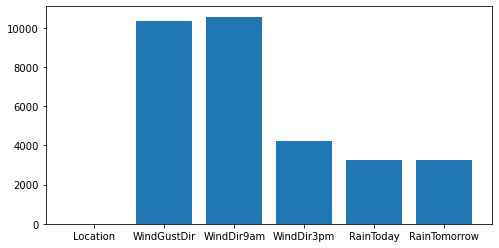

In [46]:
plt.figure(figsize= (8,4))
plt.bar(missing_cat.index,missing_cat.values ) # by visualization we can see that winDir3pm has large number of missing values 

In [47]:
cat_features_with_null = [features for features in categorical_features if df[features].isnull().sum()]  # list will return with categorical features
for each_feature in cat_features_with_null:
  df[each_feature] = df[each_feature].fillna(df[each_feature].mode()[0])    
   #each cat_feature is filled by most repeated value (mode/)



In [49]:
df[categorical_features].isnull().sum()  # here we can see ther is no missing values now 

Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

#### Menangani Missing Value (Numerical)

In [51]:
num_col = [num_col for num_col in df.columns if df[num_col].dtype !="O"] 
#numerical features extraction from the data 

In [52]:
missing_num = df[num_col].isnull().sum()    # counting missing values in each  num_feature 
missing_num

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
Year                 0
Month                0
Day                  0
dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

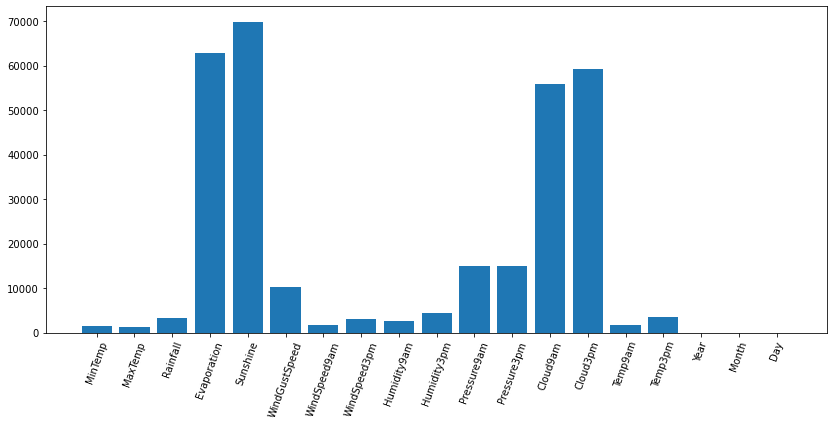

In [53]:
plt.figure(figsize=(14,6))
plt.bar(missing_num.index,missing_num.values)    # ploting missing values 
plt.xticks(rotation=70)

In [55]:
num_col_with_null_values = [col for col in num_col if df[col].isnull().sum()]
missing_values = df[num_col_with_null_values].isnull().sum()
missing_values

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
dtype: int64

<AxesSubplot:>

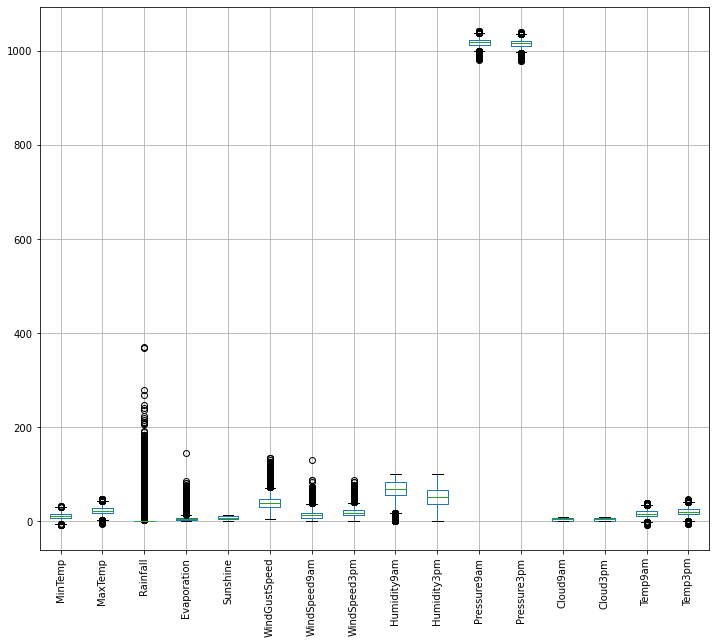

In [56]:
# we can not directly impute missing values by using mean becuase there could be a chance of outliers in the data 
# lets check by box plot 
plt.figure(figsize=(12,10))
df.boxplot(num_col_with_null_values,rot = 90)

we can see that there are many outliers in specially Rainfall and other featrures, lets handle this 

#### Menangani Outliers untuk Numerical Atribut

In [57]:
# Remove Outliers from Numerical Features 

features_with_outliers = num_col_with_null_values
for feature in features_with_outliers:
  q1 = df[feature].quantile(0.25)
  q3 = df[feature].quantile(0.75)
  IQR = q3-q1
  lower_limit = q1 - (IQR*1.5)
  upper_limit = q3 + (IQR*1.5)
  df.loc[df[feature]<lower_limit, feature] = lower_limit
  df.loc[df[feature]>upper_limit, feature] = upper_limit

# after running this the outliers will be removed from our numerical features of the data 

<AxesSubplot:>

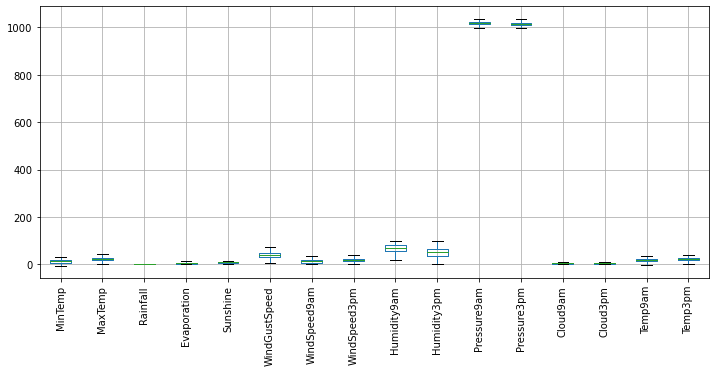

In [59]:
plt.figure(figsize=(12,5))
df.boxplot(num_col_with_null_values,rot = 90)    # we can see there is no outliers now 

In [60]:
for features in num_col_with_null_values:
  df[features] = df[features].fillna(df[features].mean())   # all missing values imputed by mean 

In [62]:
df[num_col_with_null_values].isnull().sum()  # we can see there is no null values now 

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [125]:
# Categorical variabel now need transformed into dummy variables in order to be useable in the modeling section.
categoricals = ['WindGustDir', 'WindDir9am', 'WindDir3pm']
# df_dummies = pd.get_dummies(df, columns=categoricals)
df_dummies = df.copy()
df_dummies.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,5.318667,7.611178,W,44.0,W,WNW,...,1007.1,8.000000,4.50993,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,5.318667,7.611178,WNW,44.0,NNW,WSW,...,1007.8,4.447461,4.50993,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,5.318667,7.611178,WSW,46.0,W,WSW,...,1008.7,4.447461,2.00000,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,5.318667,7.611178,NE,24.0,SE,E,...,1012.8,4.447461,4.50993,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,5.318667,7.611178,W,41.0,ENE,NW,...,1006.0,7.000000,8.00000,17.8,29.7,No,No,2008,12,5


In [126]:
df_dummies.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Year', 'Month', 'Day'],
      dtype='object')

### Explorasi Data

#### Summary Info and Stats

In [127]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        145460 non-null  float64
 2   MaxTemp        145460 non-null  float64
 3   Rainfall       145460 non-null  float64
 4   Evaporation    145460 non-null  float64
 5   Sunshine       145460 non-null  float64
 6   WindGustDir    145460 non-null  object 
 7   WindGustSpeed  145460 non-null  float64
 8   WindDir9am     145460 non-null  object 
 9   WindDir3pm     145460 non-null  object 
 10  WindSpeed9am   145460 non-null  float64
 11  WindSpeed3pm   145460 non-null  float64
 12  Humidity9am    145460 non-null  float64
 13  Humidity3pm    145460 non-null  float64
 14  Pressure9am    145460 non-null  float64
 15  Pressure3pm    145460 non-null  float64
 16  Cloud9am       145460 non-null  float64
 17  Cloud3pm       145460 non-nul

In [128]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000
mean,12.194186,23.224781,0.487224,5.318667,7.611178,39.837792,13.951313,18.574162,68.933567,51.539116,1017.670297,1015.269781,4.447461,4.509930,16.991728,21.686191,2012.769751,6.399615,15.712258
std,6.365000,7.069787,0.783872,2.576814,2.729486,12.515516,8.555341,8.442182,18.703607,20.471189,6.651697,6.606721,2.265604,2.092954,6.441838,6.822800,2.537684,3.427262,8.794789
min,-6.350000,2.450000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,18.000000,0.000000,998.650000,996.000000,0.000000,0.000000,-1.650000,1.900000,2007.000000,1.000000,1.000000
25%,7.700000,18.000000,0.000000,4.000000,7.611178,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.100000,3.000000,4.000000,12.300000,16.700000,2011.000000,3.000000,8.000000
50%,12.100000,22.700000,0.000000,5.318667,7.611178,39.000000,13.000000,18.574162,69.000000,51.539116,1017.670297,1015.269781,4.447461,4.509930,16.800000,21.400000,2013.000000,6.000000,16.000000
75%,16.800000,28.200000,0.600000,5.318667,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.200000,2015.000000,9.000000,23.000000
max,30.850000,43.650000,2.000000,14.600000,14.500000,73.500000,37.000000,40.500000,100.000000,100.000000,1036.650000,1034.400000,9.000000,9.000000,35.550000,41.100000,2017.000000,12.000000,31.000000


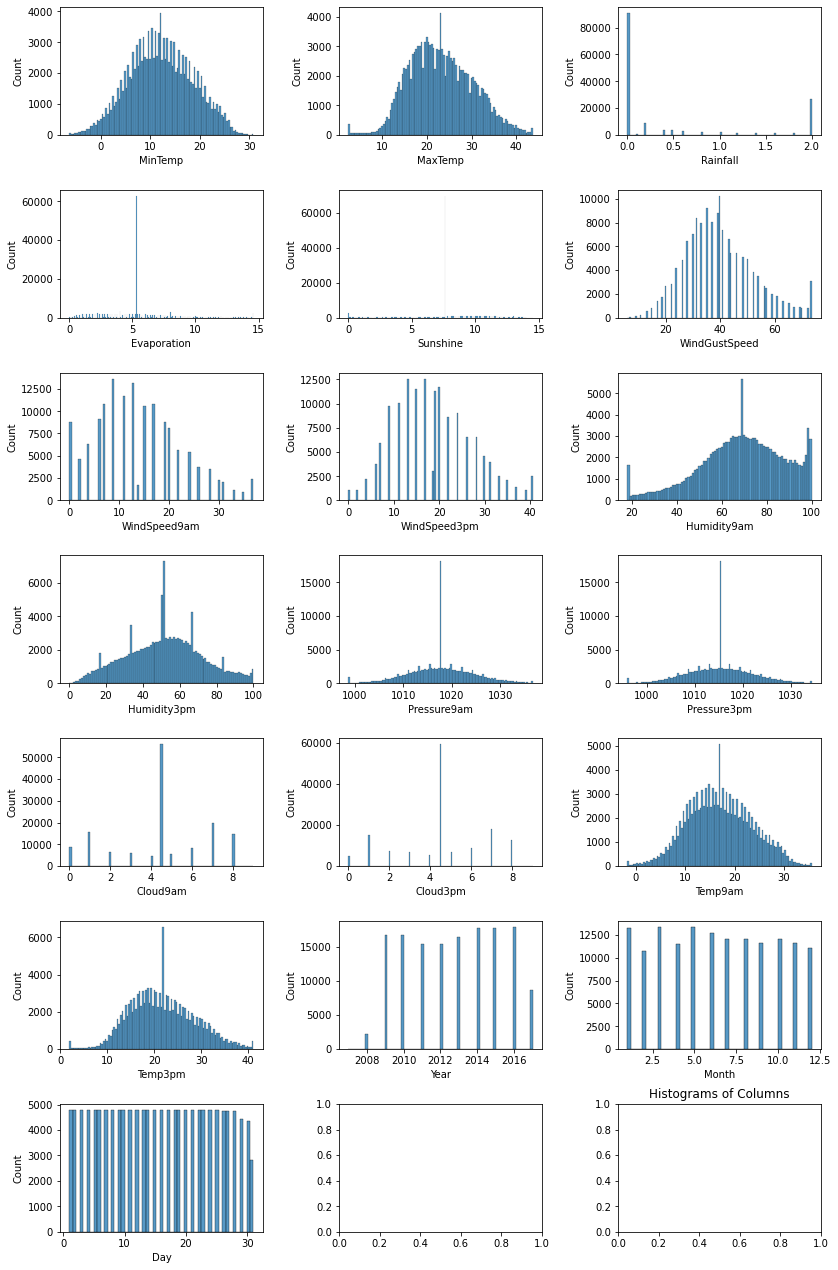

In [129]:
# Untuk melihat histogram dari kolom numerical. Dihentikan sampai 21 karena nilai setelahnya adalah integer 0 dan 1 (misal WinDir3pm_WNW) sehingga tidak ditampilkan.
fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(12, 18))
axes = axes.reshape(-1)

continuous = [col for col in df_dummies.columns if df_dummies[col].dtype != object ]

for i, col in enumerate(continuous):
    sns.histplot(df_dummies[col], ax=axes[i])
    if (i == 20):
      break;

fig.tight_layout(pad=2.0)
plt.title('Histograms of Columns');


Analisis 
- Sebagian besar fitur terdistribusi secara normal seperti yang diharapkan.
- Distribusi `Sunshine` menarik tetapi sebagian besar dapat dijelaskan:
  - Frekuensi tinggi nilai 0 mewakili hari-hari di mana mendung sepanjang hari
  - Penurunan frekuensi yang tiba-tiba setelah sekitar 11 jam merupakan cerminan dari terbatasnya jumlah hari dalam setahun di mana cahaya padam selama berjam-jam atau lebih lama
- Distribusi `Humidity9am` sangat menarik karena lonjakan frekuensi yang besar

#### Central Tendency

---Menghitung Tendensi Sentral---
Mean:  1017.6702967904671
Mode:  1017.6702967905602
Median:  1017.6702967905602


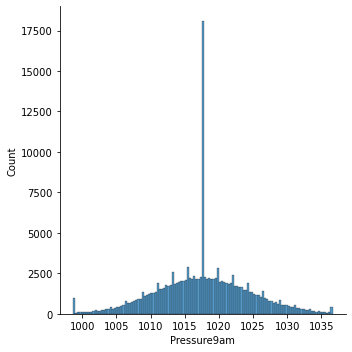

In [130]:
print("---Menghitung Tendensi Sentral---")
sns.displot(df_dummies.Pressure9am)
print("Mean: ", df_dummies['Pressure9am'].mean())
print("Mode: ", df_dummies['Pressure9am'].mode()[0])
print("Median: ", df_dummies['Pressure9am'].median())


Analisis
- Dari median, mean, dan mode yang sudah sama hasilnya, artinya ini terdistribusi secara sangat normal. Tidak ada condong ke kanan dan kiri.

#### Variability

In [131]:
# Variance
# kuadrat jarak rata-rata antara setiap kuantitas dan mean.
print('Variance dari Kolom MaxTemp = ', df_dummies['MaxTemp'].var(ddof=1))


Variance dari Kolom MaxTemp =  49.98188178413633


In [132]:
# Standard Deviation
#Standar deviasi yang rendah menunjukkan bahwa titik data cenderung mendekati rata-rata kumpulan data, sedangkan Standar deviasi yang tinggi menunjukkan bahwa titik data tersebar di nilai yang lebih luas.
print('Standard Deviation dari Kolom MaxTemp = ', df_dummies['MaxTemp'].var(ddof=1)**0.5)

Standard Deviation dari Kolom MaxTemp =  7.06978654445354


In [133]:
# Skewness


x = df_dummies['MaxTemp']

n = len(x)

mean_ = sum(x) / n
var_ = sum((item - mean_)**2 for item in x) / (n-1)
std_ = var_ ** 0.5

skew_ = (sum((item - mean_)**3 for item in x) * n / ((n - 1) * (n - 2) * std_**3))

print("Nilai skew adalah ", skew_)


Nilai skew adalah  0.23695598479201244


In [121]:
# Percentiles
df_dummies['MaxTemp'].describe()

count    145460.000000
mean         23.224781
std           7.069787
min           2.450000
25%          18.000000
50%          22.700000
75%          28.200000
max          43.650000
Name: MaxTemp, dtype: float64

In [134]:
# Ranges
print('Range Kolom MaxTemp: ', df_dummies['MaxTemp'].max() - df_dummies['MaxTemp'].min())

Range Kolom MaxTemp:  41.2


Analisis
- Nilai standard deviation/variance menunjukkan seberapa tersebar data kita
- Nilai range nya 41,2 artinya jarak antara nilai terendah dan tertinggi. Jika digabung dengan standard deviation bisa menujukkan seberapa landai/curam kurva.  
- Nilai skewnessnya positif, artinya distribusinya positively skewed yaitu condong ke kiri
- Nilai percentiles menunjukkan pada rentang 75%, 50%, 25% berapa nilai data.

#### Mencari Rainy Days berdasarkan Location

In [135]:
# Buat salinan dataframe and ubah value RainToday and Tommorow menjadi 0 dan 1
df_dummies_ = df_dummies.copy()
df_dummies_.RainToday = [1 if each == 'Yes' else 0 for each in df_dummies_.RainToday]
df_dummies_.RainTomorrow = [1 if each == 'Yes' else 0 for each in df_dummies_.RainTomorrow]
df_dummies_['RainToday']


0         0
1         0
2         0
3         0
4         0
         ..
145455    0
145456    0
145457    0
145458    0
145459    0
Name: RainToday, Length: 145460, dtype: int64

In [106]:
df_rain_by_loc = df_dummies_.groupby(by='Location').sum()
df_rain_by_loc = df_rain_by_loc[['RainToday']]
df_rain_by_loc.head()

,RainToday
Location,
Adelaide,689
Albany,902
Albury,617
AliceSprings,244
BadgerysCreek,583


Bagan di atas berguna untuk memeriksa dengan cepat perbedaan antar lokasi sehubungan dengan jumlah hari hujan tetapi memiliki satu masalah utama: jumlah pengamatan dari setiap lokasi tidak persis sama. Memeriksa jumlah nilai untuk setiap lokasi (di bawah) mengungkapkan bahwa lokasi `Katherine`, `Nhil`, dan `Uluru` harus diabaikan saat menganalisis plot di atas. Lokasi yang tersisa memiliki jumlah nilai yang cukup dekat untuk dapat dibandingkan dengan benar.

### Data Preprocessing

#### Numerical Encoding

In [137]:
df_dummies.isnull().sum() # as there is no null values now 
# and for Machine learning we know machine understand only numerical data so we need to convert 
# categorical features into Dummy variables or need to do encoding 

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Year             0
Month            0
Day              0
dtype: int64

In [139]:
cat_fea = [i for i in df_dummies.columns if df_dummies[i].dtype == "O"]
cat_fea   # Finding final categorical features that is need to be turned into Numericals Encoding means numerical values 

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [140]:
# here we are defining a function 
def encode_cat(feature):   # function will take feature 
  mapping_dic = {}         # empty dic 
  unique_val = list(df[feature].unique())    # extract particular feature from data and convert into list 
  for idx in range(len(unique_val)):      #loop will run till the len of list 
    mapping_dic[unique_val[idx]] = idx    # assign the index to the index of the list 
  return mapping_dic       # return the feature 


In [141]:
for i in cat_fea:   # we have the list of categorical features 
  df_dummies[i].replace(encode_cat(i), inplace = True)  
  print(df_dummies.head())

   Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0         0     13.4     22.9       0.6     5.318667  7.611178           W   
1         0      7.4     25.1       0.0     5.318667  7.611178         WNW   
2         0     12.9     25.7       0.0     5.318667  7.611178         WSW   
3         0      9.2     28.0       0.0     5.318667  7.611178          NE   
4         0     17.5     32.3       1.0     5.318667  7.611178           W   

   WindGustSpeed WindDir9am WindDir3pm  ...  Pressure3pm  Cloud9am  Cloud3pm  \
0           44.0          W        WNW  ...       1007.1  8.000000   4.50993   
1           44.0        NNW        WSW  ...       1007.8  4.447461   4.50993   
2           46.0          W        WSW  ...       1008.7  4.447461   2.00000   
3           24.0         SE          E  ...       1012.8  4.447461   4.50993   
4           41.0        ENE         NW  ...       1006.0  7.000000   8.00000   

   Temp9am  Temp3pm  RainToday  RainTomorrow  Year

* we have converted all categorical data into numerical values 
* first we separtated it and then we converted into numerical 

#### Correlation

<AxesSubplot:>

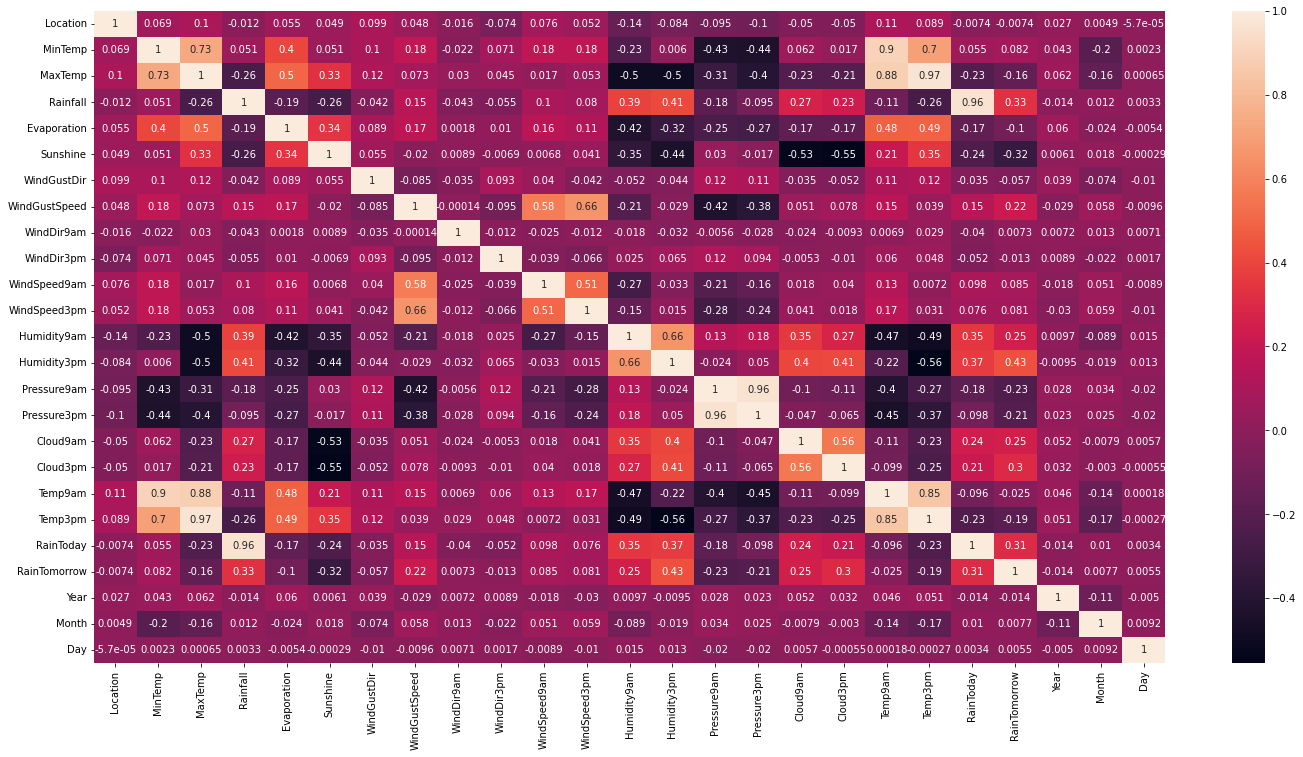

In [143]:
plt.figure(figsize =(24,12))
sns.heatmap(df_dummies.corr(), annot = True)

#### Splitting Data

In [144]:
y = df_dummies["RainTomorrow"]  # dependent or target 
x = df_dummies.drop(["RainTomorrow"],axis = 1)  # indepedent or input 

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

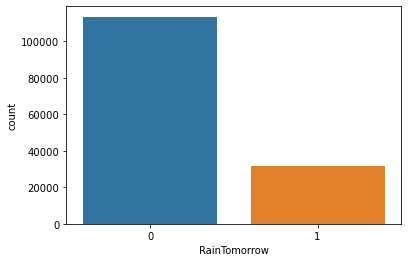

In [146]:
# Exploring Targeted Variable 

sns.countplot(df_dummies["RainTomorrow"])

# as we see  can see here the data is unbalanced so we are going to use over sampling method for better forcasting 

### Pendefinisian Model

#### Splitting Data Into Training and Testing

In [160]:
# testing and splitting 
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0 )

In [162]:
print("Length of Training Data: {}".format(len(x_train)))
print("Length of Testing Data: {}".format(len(x_test)))

Length of Training Data: 116368
Length of Testing Data: 29092


#### Feature Scaling

In [163]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)


In [164]:
x_test = scaler.transform(x_test)

#### Logistic Regression

In [5]:

classifier_logreg = LogisticRegression(solver='liblinear', random_state=0)
classifier_logreg.fit(x_train, y_train)

NameError: name 'x_train' is not defined

#### SVM

In [165]:

classifier_svm = svm.SVC(kernel='linear')
classifier_svm.fit(x_train,y_train)

### Evaluasi Model

#### Logistic Regression

In [4]:
# Model Testing
y_pred_logreg = classifier_logreg.predict(x_test)
y_pred_logreg

NameError: name 'classifier_logreg' is not defined

In [156]:
# Model Accuracy
print("Accuracy Score: {}".format(accuracy_score(y_test,y_pred_logreg)))

Accuracy Score: 0.8444933315000688


In [157]:
# Model Score
print("Train Data Score: {}".format(classifier_logreg.score(x_train, y_train)))
print("Test Data Score: {}".format(classifier_logreg.score(x_test, y_test)))

Train Data Score: 0.8437714835693662
Test Data Score: 0.8444933315000688


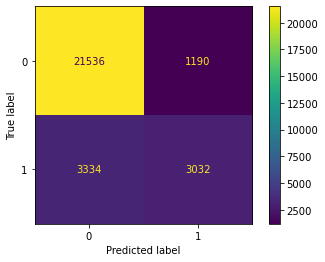

In [158]:
# Confussion Matric
plot_confusion_matrix(classifier_logreg, x_test,y_test)


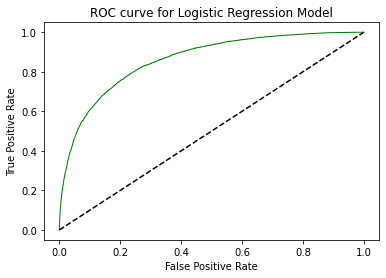

In [159]:
# ROC Curve
y_pred_logreg_proba = classifier_logreg.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_logreg_proba[:,1])
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,'-g',linewidth=1)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for Logistic Regression Model')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.show()

#### SVM

In [ ]:
# Model Testing
y_pred_svm = classifier_svm.predict(x_test)
y_pred_svm

In [ ]:
# Model Accuracy
print("Accuracy Score: {}".format(accuracy_score(y_test,y_pred_svm)))

In [ ]:
# Model Score
print("Train Data Score: {}".format(classifier_svm.score(x_train, y_train)))
print("Test Data Score: {}".format(classifier_svm.score(x_test, y_test)))

In [ ]:
# Confussion Matrix

plot_confusion_matrix(classifier_svm, x_test,y_test)


In [ ]:
# ROC Curve
y_pred_svm_proba = classifier_svm.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_svm_proba[:,1])
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,'-g',linewidth=1)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for SVM')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.show()

### Model Inference

### Pengambilan Kesimpulan